In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df_catalogo = pd.read_csv("catalogo.csv", sep=";", encoding="latin1")

df_data_a = pd.read_csv("dataset_a.csv", sep=";", encoding="latin1")

df_data_2021 = pd.read_csv("dataset_a_2021.csv", sep=";", encoding="latin1")

In [3]:
df_catalogo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hito        53 non-null     int64 
 1   oid         53 non-null     object
 2   nombre      53 non-null     object
 3   s1          53 non-null     int64 
 4   s2          53 non-null     int64 
 5   s3          53 non-null     int64 
 6   s4          53 non-null     int64 
 7   k1          53 non-null     int64 
 8   k2          53 non-null     int64 
 9   k3          53 non-null     int64 
 10  k4          53 non-null     int64 
 11  skill       53 non-null     int64 
 12  knowledge   53 non-null     int64 
 13  complexity  53 non-null     int64 
 14  item        53 non-null     object
dtypes: int64(12), object(3)
memory usage: 6.3+ KB


In [4]:
df_data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Columns: 110 entries, rut to estado
dtypes: float64(37), int64(55), object(18)
memory usage: 401.5+ KB


In [5]:
df_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 76 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hito1     839 non-null    float64
 1   hito2     839 non-null    float64
 2   hito3     839 non-null    int64  
 3   hito4     839 non-null    int64  
 4   seq1      667 non-null    object 
 5   seq2      11 non-null     object 
 6   seq3      0 non-null      float64
 7   seq4      0 non-null      float64
 8   c1        667 non-null    object 
 9   c2        11 non-null     object 
 10  c3        0 non-null      float64
 11  c4        0 non-null      float64
 12  p1        667 non-null    object 
 13  p2        11 non-null     object 
 14  p3        0 non-null      float64
 15  p4        0 non-null      float64
 16  nrc       839 non-null    int64  
 17  exitosos  839 non-null    int64  
 18  fallidos  839 non-null    int64  
 19  envios    839 non-null    int64  
 20  e0        839 non-null    int64 

[16.82441113490364, 4.398286937901499, 0.0, 0.0]
[7.80469784150091, 4.366257329533448, 0.0, 0.0]
            hito1       hito2  hito3  hito4
count  467.000000  467.000000  467.0  467.0
mean    16.824411    4.398287    0.0    0.0
std      7.804698    4.366257    0.0    0.0
min      0.000000    0.000000    0.0    0.0
25%     14.000000    1.000000    0.0    0.0
50%     19.000000    3.000000    0.0    0.0
75%     22.000000    6.000000    0.0    0.0
max     27.000000   28.000000    0.0    0.0


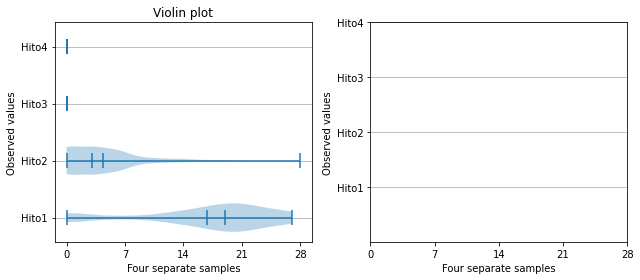

In [19]:
df_notas = pd.DataFrame()
df_notas = df_data_a[[ 'hito1', 'hito2', 'hito3', 'hito4']].copy()
df_notas.columns = [ 'hito1', 'hito2', 'hito3', 'hito4']
a= df_notas.describe()
mean=[df_notas.loc[:, 'hito1'].mean(),df_notas.loc[:, 'hito2'].mean(),df_notas.loc[:, 'hito3'].mean(),df_notas.loc[:, 'hito4'].mean()]
std=[df_notas.loc[:, 'hito1'].std(),df_notas.loc[:, 'hito2'].std(),df_notas.loc[:, 'hito3'].std(),df_notas.loc[:, 'hito4'].std()]
print(mean)
print(std)
print(a)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

axs[0].violinplot(df_notas,
                  showmeans=True,
                  showmedians=True, vert=False)
axs[0].set_title('Gráfico de Violín')

for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks(np.arange(0,29,7))
    ylabels = ["Hito1","Hito2","Hito3","Hito4"]
    ax.set_yticks(range(1,5), labels=ylabels)
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

fig.tight_layout()
plt.show()

In [24]:
df_pruebas = pd.DataFrame()
df_pruebas = df_data_a[['rut', 'sol1', 'sol2', 'sol3', 'sol4', 'tarea1', 'tarea2', 'controles', 'np', 'examen', 'final', 'estado']].copy()
df_pruebas.columns = ['rut', 'solemne1', 'solemne2', 'solemne3', 'solemne4', 'tarea1', 'tarea2', 'nota_controles', 'nota_presentacion', 'nota_examen', 'nota_final', 'estado']
df_pruebas.head()
mean = [df_pruebas.loc[:, i].mean() for i in ['solemne1', 'solemne2', 'solemne3', 'solemne4', 'tarea1', 'tarea2', 'nota_controles', 'nota_presentacion', 'nota_examen', 'nota_final'] ]
std = [df_pruebas.loc[:, i].std() for i in ['solemne1', 'solemne2', 'solemne3', 'solemne4', 'tarea1', 'tarea2', 'nota_controles', 'nota_presentacion', 'nota_examen', 'nota_final'] ]
print(mean)
print(std)
#mean=[df_notas.loc[:, 'hito1'].mean(),df_notas.loc[:, 'hito2'].mean(),df_notas.loc[:, 'hito3'].mean(),df_notas.loc[:, 'hito4'].mean()]
#std=[df_notas.loc[:, 'hito1'].std(),df_notas.loc[:, 'hito2'].std(),df_notas.loc[:, 'hito3'].std(),df_notas.loc[:, 'hito4'].std()]


[5.945824411134903, 5.6207708779443255, 5.475160599571734, 5.659957173447537, 4.752248394004283, 4.6057815845824415, 5.989293361884369, 5.2970877944325485, 5.394860813704496, 5.33104925053533]
[1.161432589558909, 1.3067573818868412, 1.4449496649497056, 1.148894971185056, 2.272444156542859, 2.338002150383234, 1.8442501219917462, 1.28033998251104, 1.4546858324543972, 1.2875599789081353]


In [9]:
df_notas.describe()


,rut,solemne1,solemne2,solemne3,solemne4,tarea1,tarea2,nota_controles,nota_presentacion,nota_examen,nota_final
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,233.000000,5.945824,5.620771,5.475161,5.659957,4.752248,4.605782,5.989293,5.297088,5.394861,5.331049
std,134.955548,1.161433,1.306757,1.444950,1.148895,2.272444,2.338002,1.844250,1.280340,1.454686,1.287560
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,116.500000,5.600000,5.200000,5.000000,5.300000,3.000000,2.500000,5.900000,4.730000,5.100000,4.900000
50%,233.000000,6.300000,6.000000,6.000000,6.000000,5.800000,5.400000,7.000000,5.610000,5.700000,5.600000
75%,349.500000,6.800000,6.400000,6.400000,6.400000,6.800000,6.900000,7.000000,6.215000,6.300000,6.200000
max,466.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [ ]:
df = px.data.gapminder()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [ ]:
df = px.data.gapminder().query("continent == 'Oceania'")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 60 to 1103
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    24 non-null     object 
 1   continent  24 non-null     object 
 2   year       24 non-null     int64  
 3   lifeExp    24 non-null     float64
 4   pop        24 non-null     int64  
 5   gdpPercap  24 non-null     float64
 6   iso_alpha  24 non-null     object 
 7   iso_num    24 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.7+ KB
